In [ ]:
# Importando bibliotecas
# (importing libraries)

# bibliotecas para modelagem e matrizes
# (libraries for modeling and matrices)
import numpy as np
import pandas as pd

# bibliotecas para análises gráficas
# (libraries for graphical analysis)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Lendo a base de
# (reading the data)
base_dados = pd.read_csv('dados_incendios.csv', encoding='latin-1')

# Imprimindo os primeiros registros 
# (firts records)
base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
# Verificando informações sobre a base de dados
# (check information)
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
# Descrição base de dados 
# Description database

base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


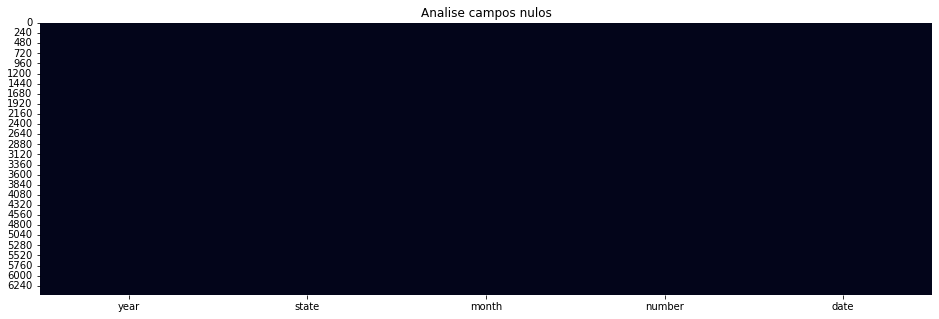

In [ ]:
# Visualizando os campos nulos no gráfico
# OBS: No gráfico abaixo podemos ver que existem campos nulos  
# na coluna 'Year' e 'Genre'
# (Visualizing the null fields in the chart
# OBS: In the chart below we can see that there are null fields
# in the 'Year' and 'Genre' column)


nulo = base_dados.isnull()

plt.figure(figsize=(16, 5))
plt.title('Analise campos nulos')
sns.heatmap(nulo, cbar=False);

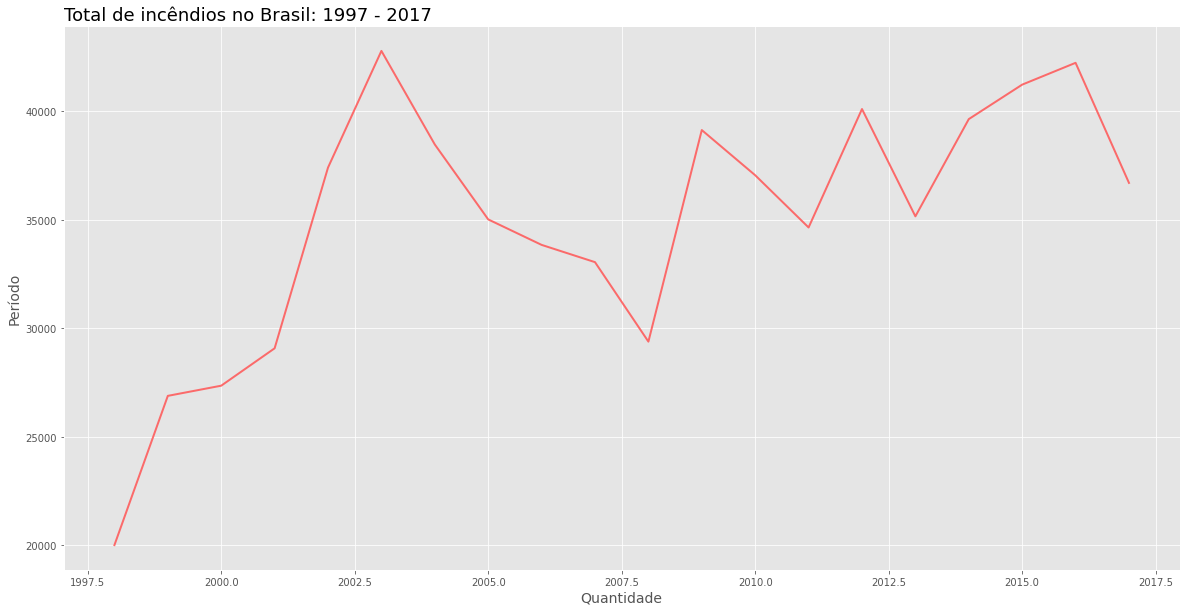

In [ ]:
# Análise por ano dos incêndios
# (Analysis by year of fires)

analise = base_dados.groupby(by=['year']).sum().reset_index()

# Gráfico 

# Tamanho 
plt.figure(figsize=(20, 10))

# Style 
plt.style.use('ggplot')

# titulo 
plt.title('Total de incêndios no Brasil: 1997 - 2017', loc='left', fontsize=18)
sns.lineplot(data=analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85);

# labels
plt.xlabel('Quantidade', fontsize=14)
plt.ylabel('Período', fontsize=14);

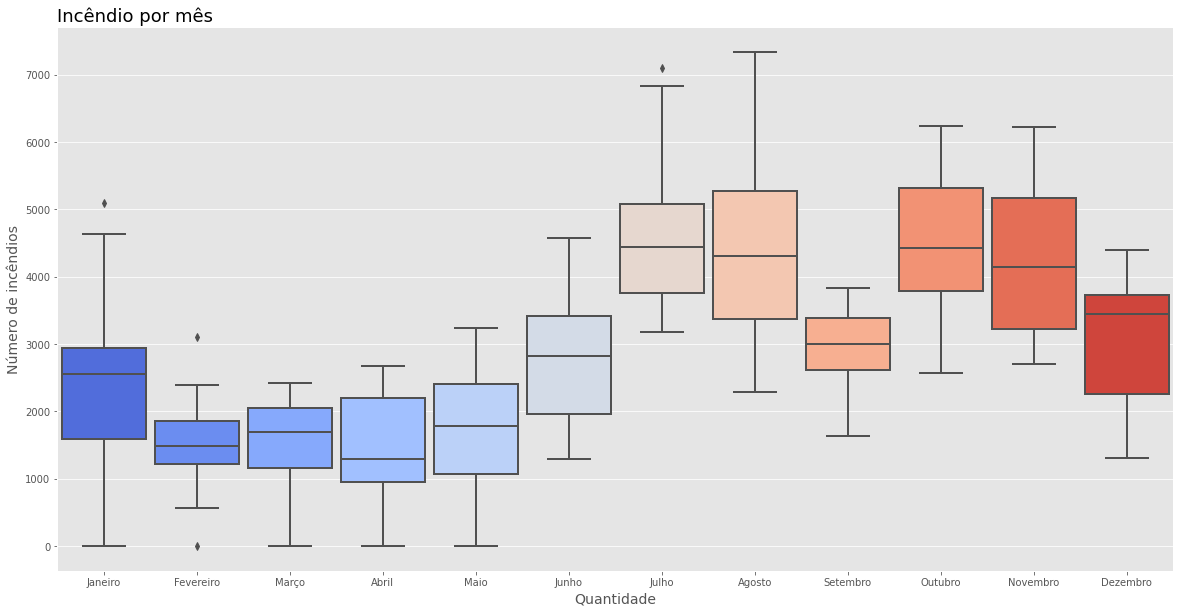

In [ ]:
# Análise por meses dos incêndios
# (Analysis by months of fires)

analise_02 = base_dados.groupby(by=['year', 'month']).sum().reset_index()

analise_02.head()

# Tamanho 
plt.figure(figsize=(20, 10))

# titulo 
plt.title('Incêndio por mês', loc='left', fontsize=18)

sns.boxplot(data=analise_02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order= ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro',
                    'Outubro', 'Novembro', 'Dezembro']);

# labels 
plt.xlabel('Quantidade', fontsize=14)
plt.ylabel('Número de incêndios', fontsize=14);

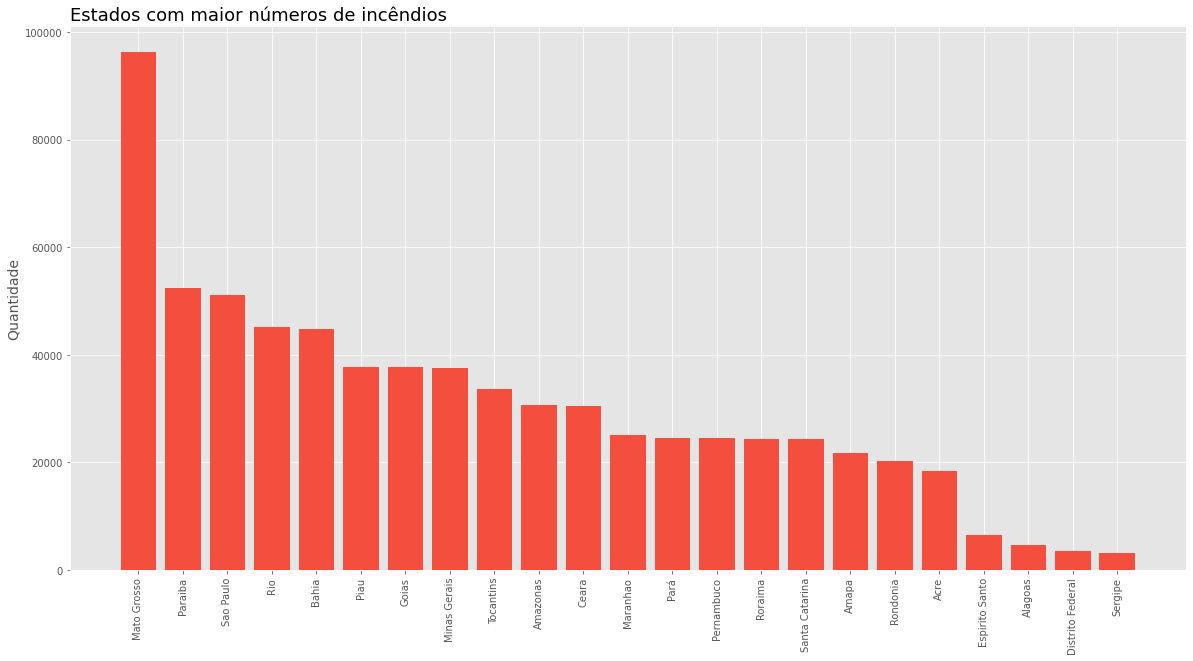

In [ ]:
# Análise por estados dos incêndios
# (Analysis by state of fires)

analise_03 = base_dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)   # Esse comando orderna do maior para o menor

analise_03.head()

# Tamanho 
plt.figure(figsize=(20, 10))

# titulo 
plt.title('Estados com maior números de incêndios', loc='left', fontsize=18)

# Gráficos
# OBS: Posso chamar minha colunas das duas formas tanto com . tando entres []
plt.bar(analise_03.state, analise_03['number'], color='#f44e3f');

# labels 
plt.ylabel('Quantidade', fontsize=14)
plt.xticks(rotation=90);

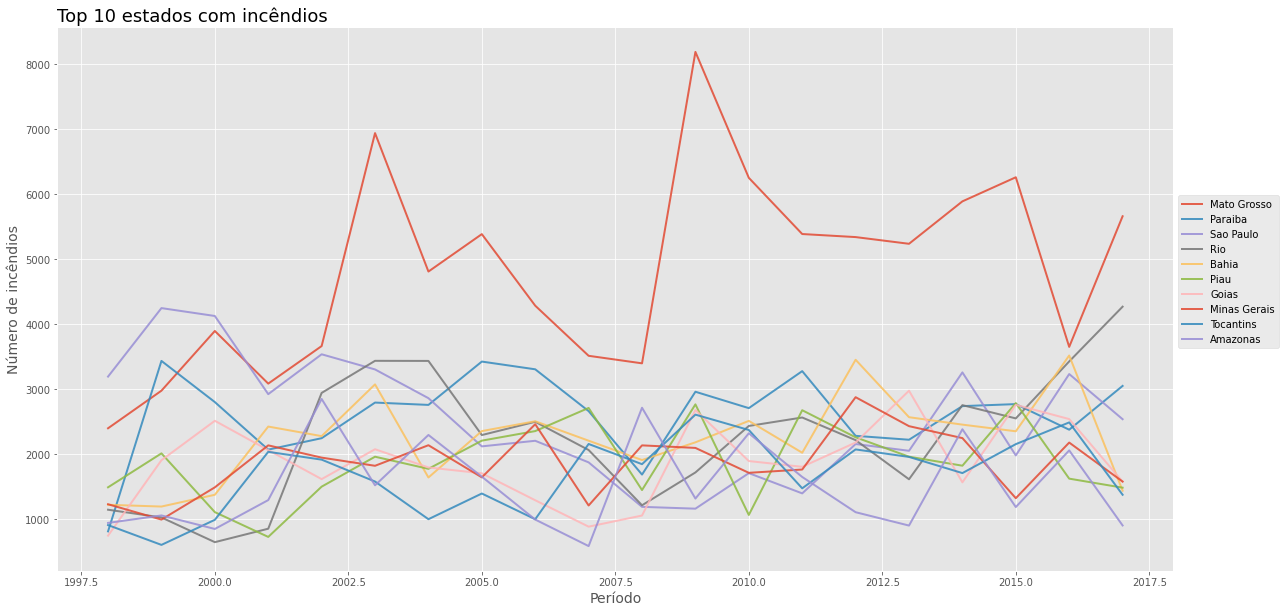

In [ ]:
# Estados top 10
# (top 10 states)
lista_top10 = analise_03['state'][0:10].values

# Tamanho 
plt.figure(figsize=(20, 10))

# titulo 
plt.title('Top 10 estados com incêndios', loc='left', fontsize=18)

for coluna in lista_top10:
    # Filtrar os estados
    filtro = base_dados.loc[base_dados['state'] == coluna]
    
    # agrupar os valores para sumarizar
    analise_local = filtro.groupby(by=['year']).sum().reset_index()

    # plot
    sns.lineplot(data=analise_local, x='year', y='number', lw=2, alpha=0.85)

# labels 
plt.ylabel('Número de incêndios', fontsize=14)
plt.xlabel('Período', fontsize=14);

# legenda 
plt.legend(lista_top10, bbox_to_anchor=(1, 0.7));

In [ ]:
# gerando os estados
estados = analise_03.sort_values('state')['state'].values

# gerando os valores
valores = analise_03.sort_values('state')['number'].values

# latitudes 
lat = [-8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
log = [-70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizando os dados
dicionario = {
    'Estados': estados,
    'Latitude': lat,
    'Longitude': log,
    'Incêndios': valores
}

# Lendo o dicionario 
analise_geografica = pd.DataFrame(dicionario)

analise_geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [ ]:
# plot geográfico 
# (geographic plot)

# Mapa de calor geografico
px.density_mapbox(
    analise_geografica,
    lat= 'Latitude',
    lon= 'Longitude', 
    z= 'Incêndios', 
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)
